# 1° Parcial 
### Aitana Orduña Lugo

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

In [77]:
df_iris = pd.read_csv(r"C:\Users\holai\OneDrive\Escritorio\Semestre 6\Modelos Computacionales II (F)\Neurociencias-2025-2\S03_datasets\iris\iris.csv")
X_iris = df_iris.iloc[:, :-1]
X_iris

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [78]:
media, sigma = X_iris.mean(axis=0), X_iris.std(axis=0)
X_iris_std = (X_iris - media)/sigma

In [79]:
pca_iris = PCA(n_components=3)
X_iris_pca = pca_iris.fit_transform(X_iris_std)

    1.1. Indicar el porcentaje de la información utilizando los 3 componentes principales

In [81]:
var_exp_iris = pca_iris.explained_variance_ratio_ * 100
for i, var in enumerate(var_exp_iris, 1):
    print(f"Componente Principal {i}: {var:.2f}%")
print("Porcentaje de varianza explicada por los 3 componentes principales:", var_exp_iris.sum())

Componente Principal 1: 72.96%
Componente Principal 2: 22.85%
Componente Principal 3: 3.67%
Porcentaje de varianza explicada por los 3 componentes principales: 99.48212908928451


    1.2. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

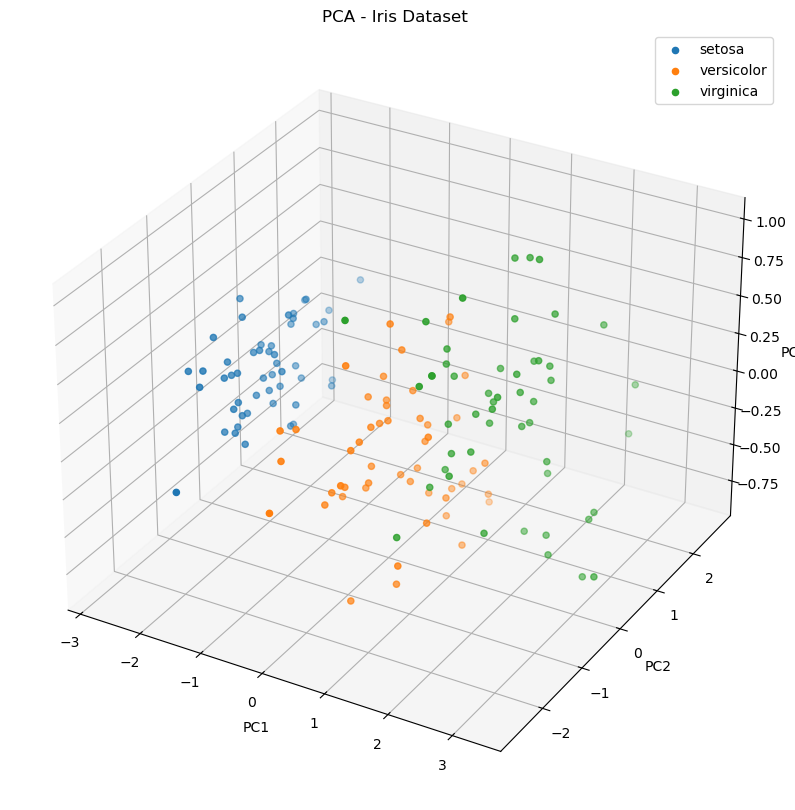

In [83]:
y = df_iris['Species']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for name in ('setosa', 'versicolor', 'virginica'):
    ax.scatter(X_iris_pca[y == name, 0],  
               X_iris_pca[y == name, 1], 
               X_iris_pca[y == name, 2],
               label=name)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title("PCA - Iris Dataset")
plt.show()

2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [85]:
df_brain = pd.read_csv(r"C:\Users\holai\OneDrive\Escritorio\Semestre 6\Modelos Computacionales II (F)\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv")
X_brain = df_brain.drop(columns=['Image', 'Class', 'Coarseness']) 
X_brain = X_brain.select_dtypes(include=[np.number])

In [86]:
X_brain_std = (X_brain - np.mean(X_brain, axis=0))/np.std(X_brain, axis=0)
X_brain_std

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0    -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1    -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2    -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3    -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4    -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
...        ...       ...                 ...       ...       ...       ...   
3757  2.050827  1.064921            1.092779 -0.139892 -0.789131 -0.349862   
3758  1.911290  1.104076            1.122668 -0.097345 -0.764704 -0.345702   
3759  1.488082  0.942399            0.997760 -0.074100 -0.700765 -0.333342   
3760  0.670746  0.501988            0.635006  0.203090 -0.534994 -0.294742   
3761 -0.589942 -0.492543           -0.370847  0.634342  0.003102 -0.121400   

      Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0    -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1    -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2    -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3     0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4     0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
...        ...       ...       ...          ...            ...          ...  
3757  0.278359  0.123407 -0.170487     0.061596       0.277439    -0.183335  
3758  0.303212  0.164116 -0.130150     0.183409       0.207915    -0.115377  
3759  0.357754  0.187301 -0.106751     0.101766       0.219037    -0.137095  
3760  0.875475  0.439344  0.167517     0.006346       0.941273    -0.568517  
3761  1.016485  0.784933  0.602848     0.117900       1.129143    -0.651387  

[3762 rows x 12 columns]

In [87]:
pca_brain = PCA()
X_brain_pca = pca_brain.fit_transform(X_brain_std)
X_brain_pca

array([[-1.13494746e+00,  1.16539283e-01, -1.22073891e-01, ...,
        -1.91276320e-01, -4.60578069e-03, -8.23668437e-04],
       [-4.26214321e+00, -4.94370904e-02,  1.50070581e+00, ...,
         1.40244217e-02, -1.53604170e-01,  1.50420695e-02],
       [ 2.48138326e+00, -1.11144579e+00, -9.57833486e-01, ...,
        -2.97130160e-02,  6.80276392e-02, -8.84459846e-03],
       ...,
       [ 2.03598078e-01, -1.77566408e+00,  1.13305801e+00, ...,
        -9.44778474e-02,  2.68384505e-02,  1.60448544e-03],
       [ 2.73145067e-01, -6.55033716e-01,  1.59330341e+00, ...,
        -9.82275324e-02,  5.63578665e-02,  1.97183450e-03],
       [-3.08959021e-01,  1.21326935e+00,  1.32536124e+00, ...,
        -9.02810238e-02,  7.31241445e-02,  5.82585573e-04]])

In [88]:
df_brain['Coarseness'].var()

0.0

¿Qué notas de extraño con la columna "Coarseness" al nombrar el dataset?
* Que la columna no tiene variabilidad y por tanto no es útil para el análisis, así que también la eliminamos. 

    2.1. Determinar el porcentaje de aporte de cada vector propio

In [91]:
var_exp_brain = pca_brain.explained_variance_ratio_ * 100
print("Porcentaje de aporte de cada vector propio:")
for i, percentage in enumerate(var_exp_brain, 1):
    print(f"Componente Principal {i}: {percentage:.2f}%")
print("Porcentaje de varianza explicada por los 3 componentes principales:", var_exp_brain.sum())

Porcentaje de aporte de cada vector propio:
Componente Principal 1: 40.88%
Componente Principal 2: 31.30%
Componente Principal 3: 12.87%
Componente Principal 4: 6.26%
Componente Principal 5: 4.78%
Componente Principal 6: 2.00%
Componente Principal 7: 1.08%
Componente Principal 8: 0.33%
Componente Principal 9: 0.26%
Componente Principal 10: 0.14%
Componente Principal 11: 0.09%
Componente Principal 12: 0.00%
Porcentaje de varianza explicada por los 3 componentes principales: 100.0


    2.2. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

In [93]:
var_exp_acumulada_brain = np.cumsum(var_exp_brain)
n_componentes = np.argmax(var_exp_acumulada_brain >= 90) + 1
print(f"Se necesitan {n_componentes} componentes principales para explicar al menos el 90% de los datos.")

Se necesitan 4 componentes principales para explicar al menos el 90% de los datos.


    2.3. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

### Método 1
* PCA (con sklearn)

In [96]:
pca_brain = PCA(n_components=4)
X_brain_pca_sklearn = pca_brain.fit_transform(X_brain_std)
X_brain_pca_sklearn

array([[-1.13494746,  0.11653928, -0.12207389, -0.30627248],
       [-4.26214321, -0.04943709,  1.50070581,  0.31306196],
       [ 2.48138326, -1.11144579, -0.95783349, -0.11793916],
       ...,
       [ 0.20359808, -1.77566408,  1.13305801,  0.33898934],
       [ 0.27314507, -0.65503372,  1.59330341, -0.42131414],
       [-0.30895902,  1.21326935,  1.32536124, -1.09447973]])

<Figure size 1000x1000 with 0 Axes>

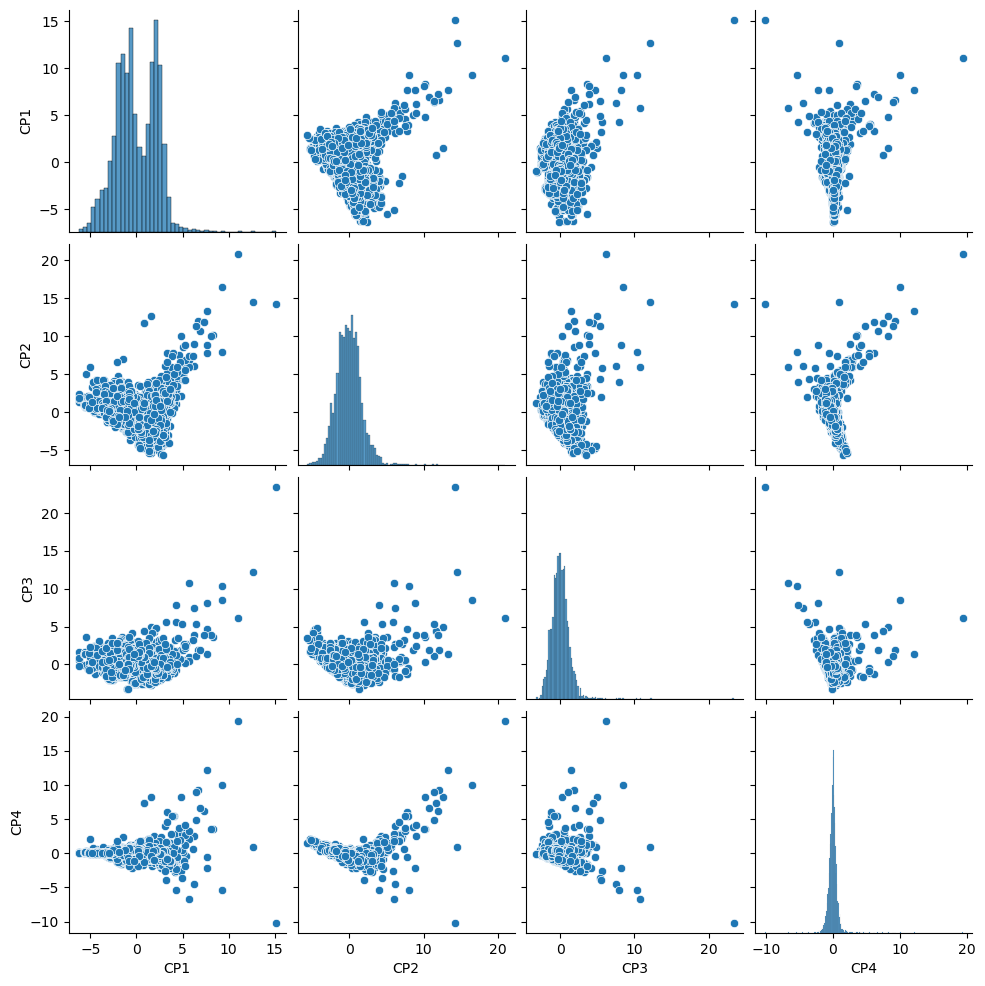

In [97]:
df_proyectado = pd.DataFrame(X_brain_pca_sklearn, columns=['CP1', 'CP2', 'CP3', 'CP4'])
plt.figure(figsize=(10, 10))
sns.pairplot(df_proyectado)
plt.show()

### Método 2
* PCA manual

                CP1           CP2           CP3           CP4
count  3.762000e+03  3.762000e+03  3.762000e+03  3.762000e+03
mean  -3.626374e-16  2.115385e-16 -5.288463e-17  1.076580e-16
std    2.215199e+00  1.938271e+00  1.243110e+00  8.671686e-01
min   -1.513938e+01 -2.090085e+01 -3.250273e+00 -1.937457e+01
25%   -1.926164e+00 -9.822461e-01 -7.651396e-01 -2.787046e-01
50%    2.759241e-01  9.365389e-02 -6.048294e-02  7.980414e-03
75%    1.640371e+00  1.196210e+00  6.320415e-01  3.494075e-01
max    6.293261e+00  5.647893e+00  2.338631e+01  1.015092e+01


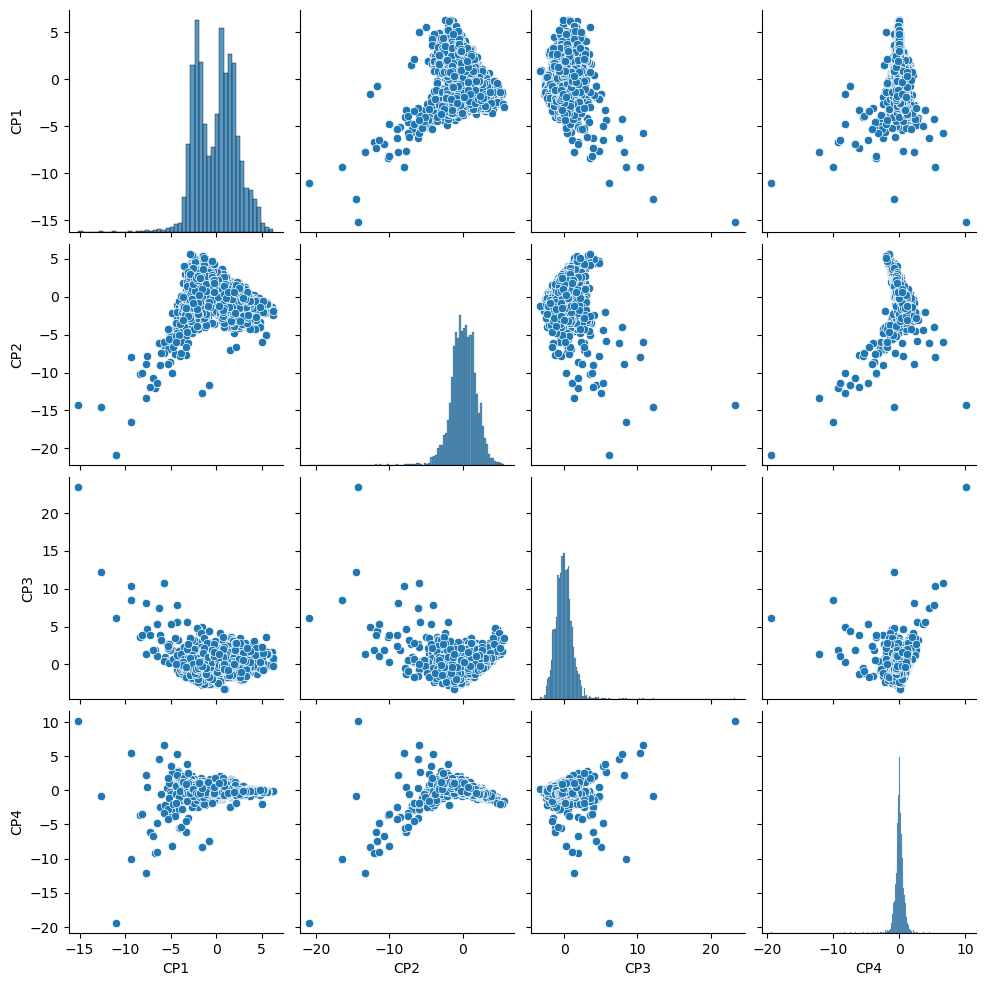

In [139]:
cov_matrix_brain = np.cov(X_brain_std.T)

eig_vals_brain, eig_vectors_brain = np.linalg.eig(cov_matrix_brain)

sorted_indices = np.argsort(eig_vals_brain)[::-1]
eig_vals_brain = eig_vals_brain[sorted_indices]
eig_vectors_brain = eig_vectors_brain[:, sorted_indices]
eig_vectors_brain = np.real(eig_vectors_brain)
W_brain = eig_vectors_brain[:, :4]  
X_brain_pca_manual = X_brain_std.dot(W_brain)
eigen_pairs = [(eig_vals_brain[i], eig_vectors_brain[:, i]) for i in range(len(eig_vals_brain))]

df_pca_manual = pd.DataFrame(X_brain_pca_manual, columns=['CP1', 'CP2', 'CP3', 'CP4'])

print(df_pca_manual.describe())

sns.pairplot(df_pca_manual)
plt.show()

In [131]:
T_matrix = np.stack([eig_vectors_brain[:, i] for i in range(4)], axis=1)
espacio_proyectado = []

for idx in range(len(X_brain_std)):
    vec = X_brain_std[idx, :]
    Tvec = T_matrix.T.dot(vec)
    espacio_proyectado.append(Tvec)
espacio_proyectado_np = np.array(espacio_proyectado)

df_proyectado = pd.DataFrame({
    'CP1': espacio_proyectado_np[:, 0], 
    'CP2': espacio_proyectado_np[:, 1], 
    'CP3': espacio_proyectado_np[:, 2],
    'CP4': espacio_proyectado_np[:, 3]
})

df_proyectado

CP1       CP2       CP3       CP4
0     1.134947 -0.116539 -0.122074  0.306272
1     4.262143  0.049437  1.500706 -0.313062
2    -2.481383  1.111446 -0.957833  0.117939
3    -3.074085  0.235259 -0.388747  0.687068
4     0.900927 -0.311275  1.345354  0.830260
...        ...       ...       ...       ...
3757 -0.321001  2.161311  1.250400 -0.579057
3758 -0.205905  2.131569  1.261261 -0.556632
3759 -0.203598  1.775664  1.133058 -0.338989
3760 -0.273145  0.655034  1.593303  0.421314
3761  0.308959 -1.213269  1.325361  1.094480

[3762 rows x 4 columns]

In [149]:
eigen_pairs[0][1], eigen_pairs[1][1]
T_matrix = np.stack([eigen_pairs[i][1] for i in range(4)], axis=1)
T_matrix
Y_brain = X_brain_std.dot(T_matrix)
Y_brain

array([[ 1.13494746, -0.11653928, -0.12207389,  0.30627248],
       [ 4.26214321,  0.04943709,  1.50070581, -0.31306196],
       [-2.48138326,  1.11144579, -0.95783349,  0.11793916],
       ...,
       [-0.20359808,  1.77566408,  1.13305801, -0.33898934],
       [-0.27314507,  0.65503372,  1.59330341,  0.42131414],
       [ 0.30895902, -1.21326935,  1.32536124,  1.09447973]])

In [151]:
print("¿Las proyecciones son iguales?", np.allclose(Y_brain, espacio_proyectado_np))

¿Las proyecciones son iguales? True


    2. 4. Hacer la comparación de los pairplot con la data original y la data proyectada

<Figure size 600x600 with 0 Axes>

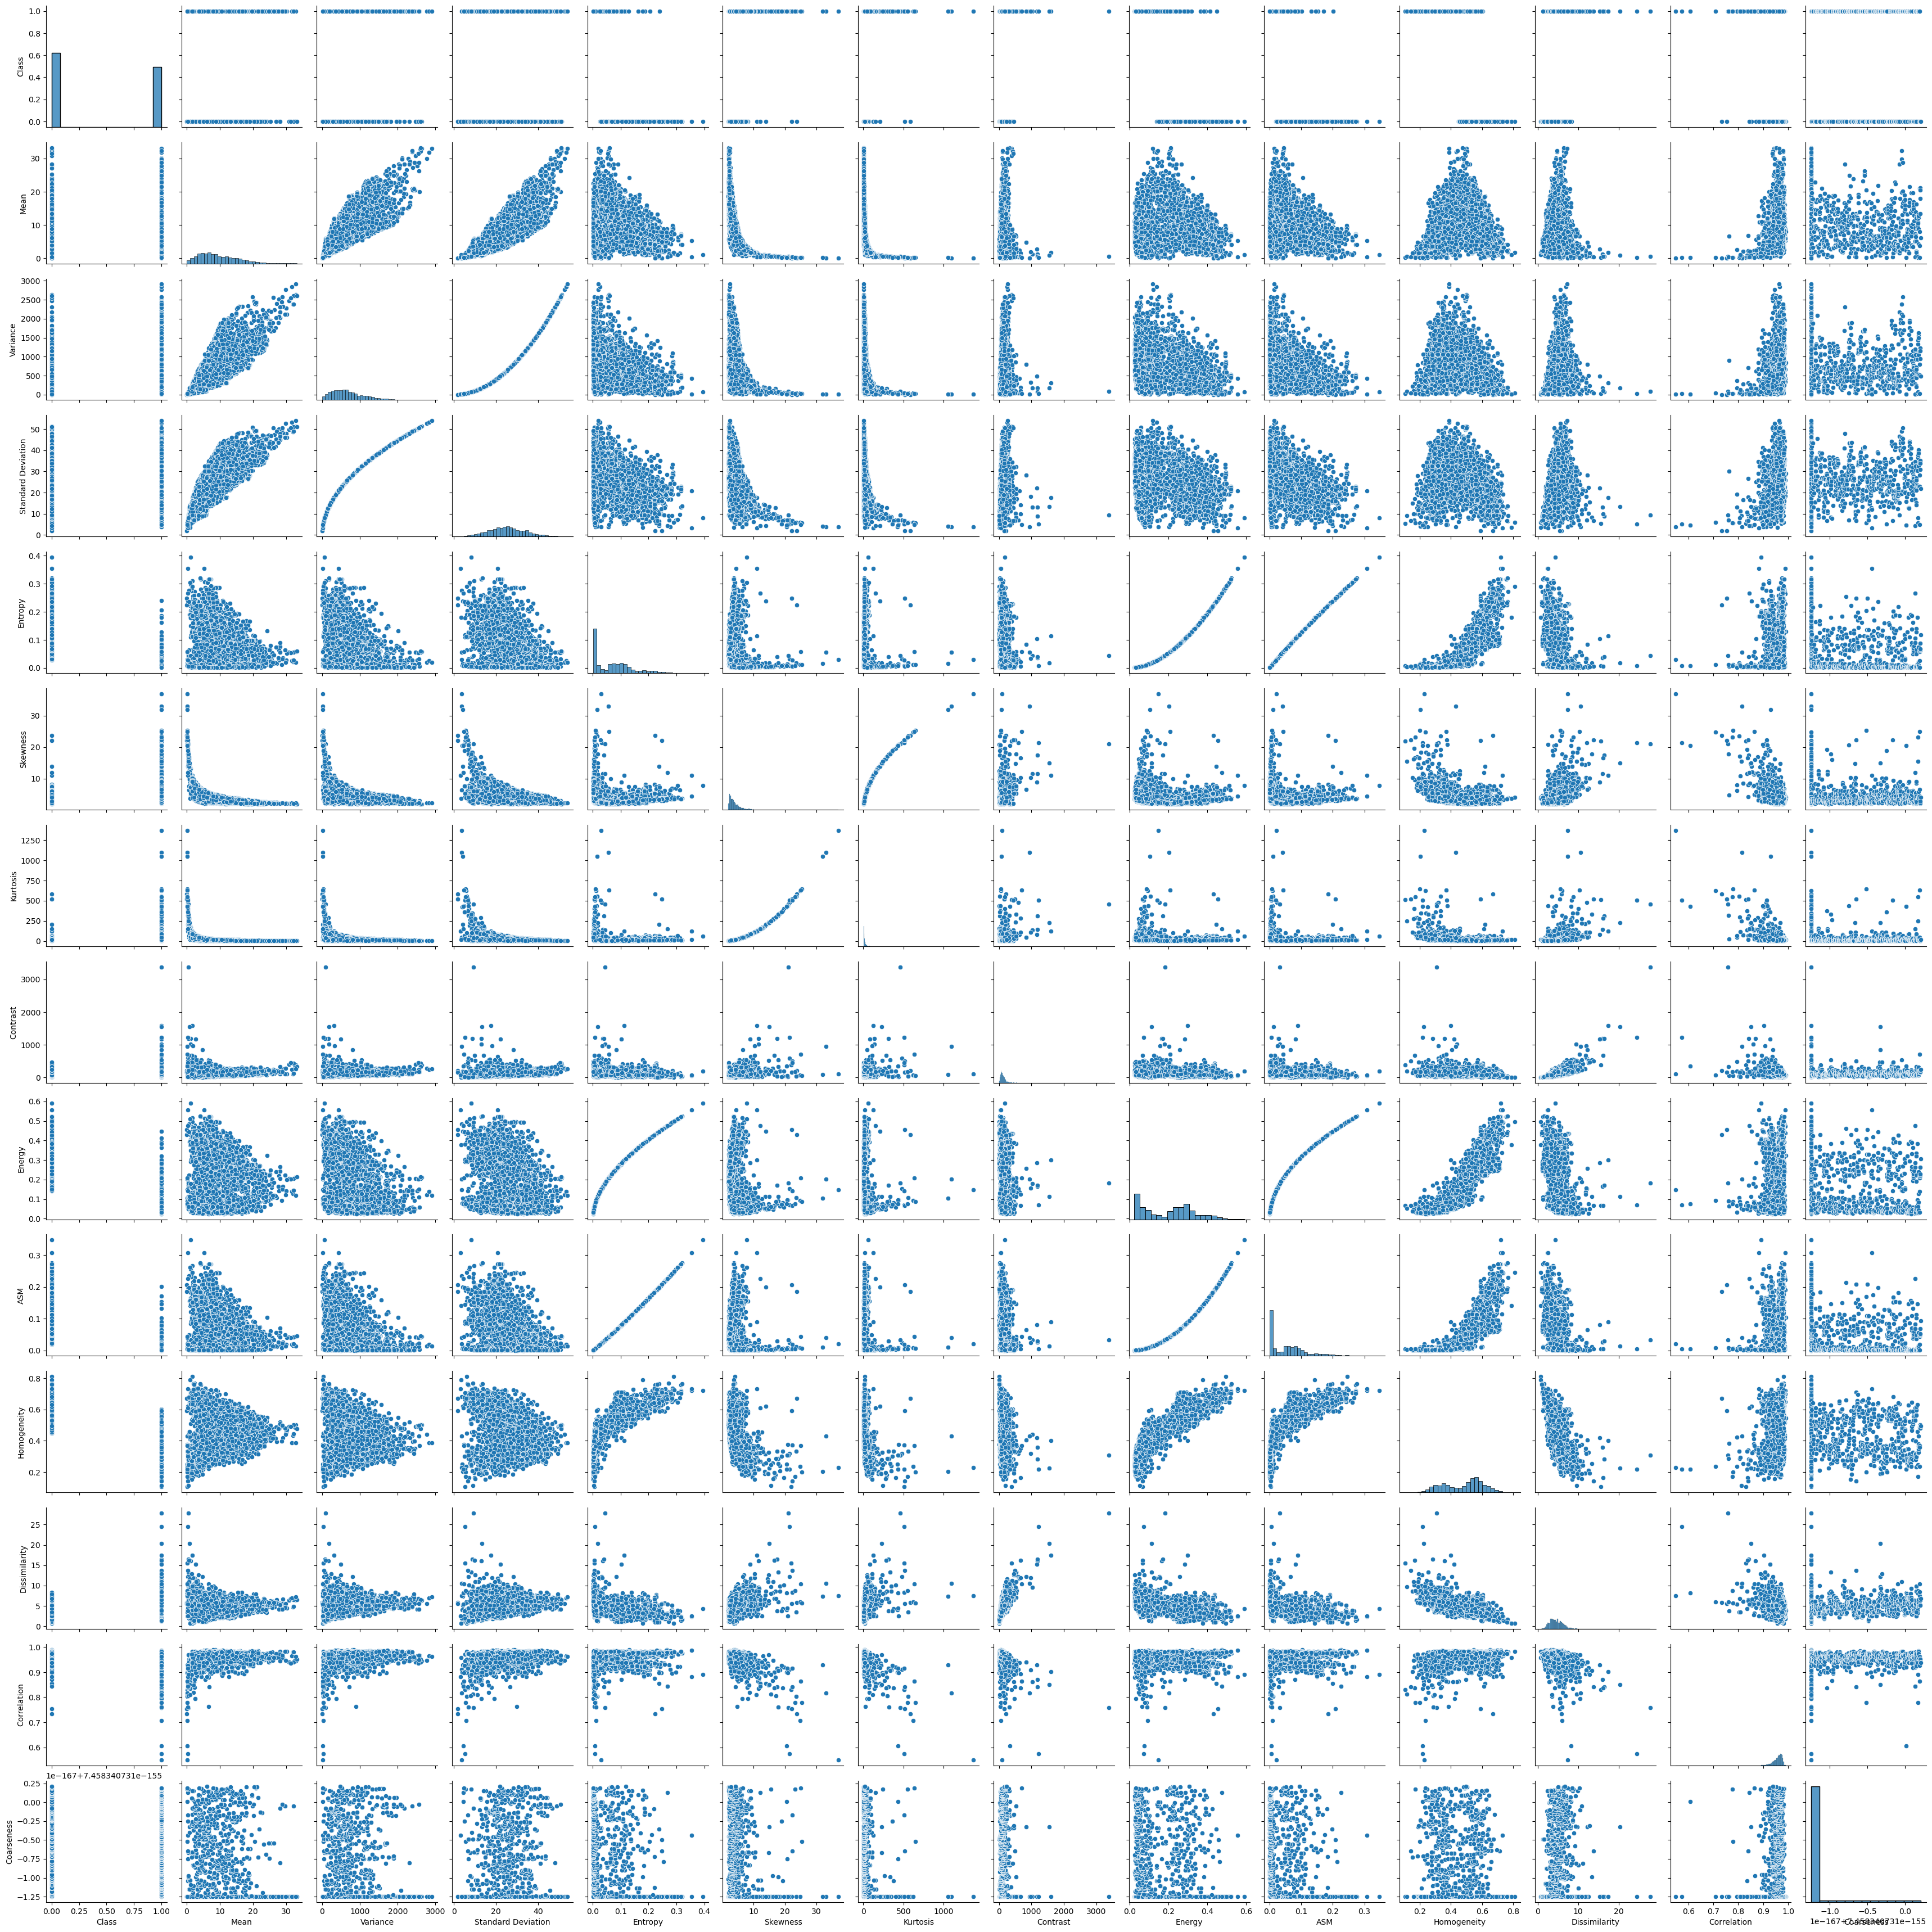

In [156]:
plt.figure(figsize=(6, 6))
sns.pairplot(df_brain)

<Figure size 600x600 with 0 Axes>

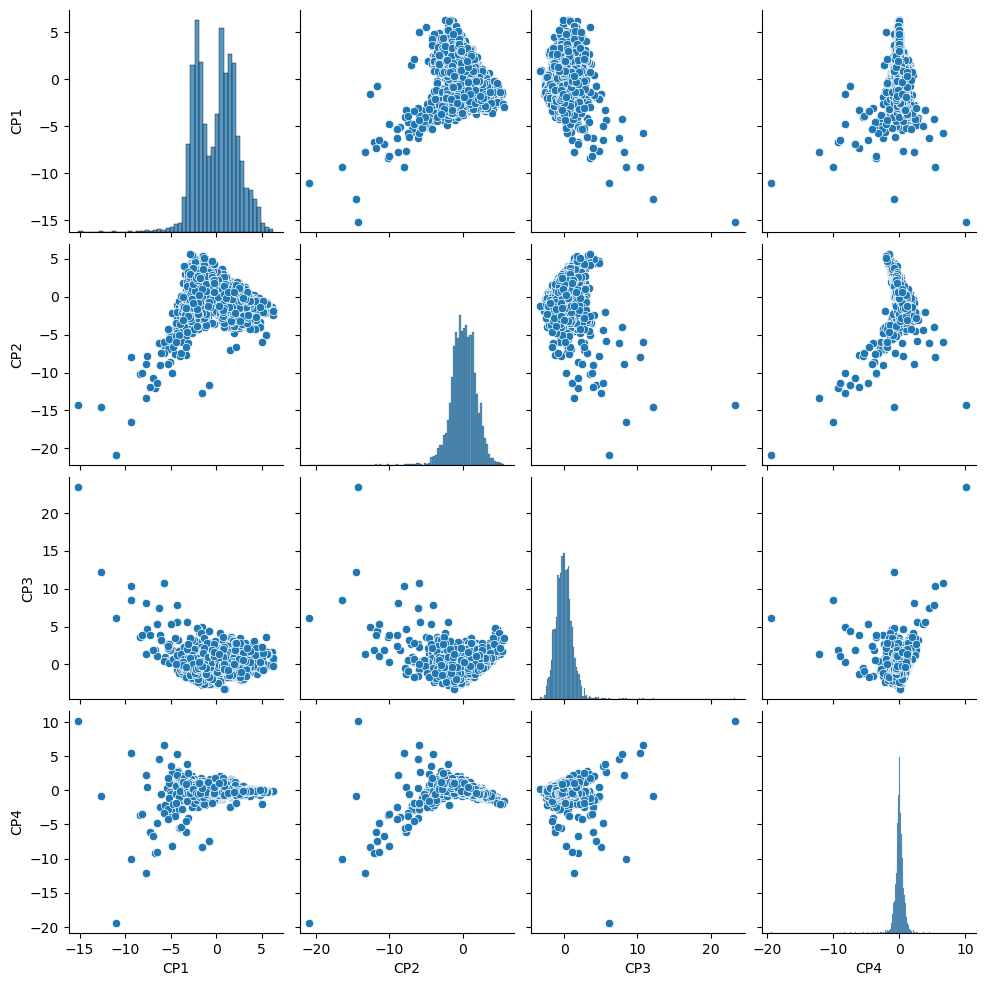

In [157]:
plt.figure(figsize=(6, 6))
sns.pairplot(df_proyectado)

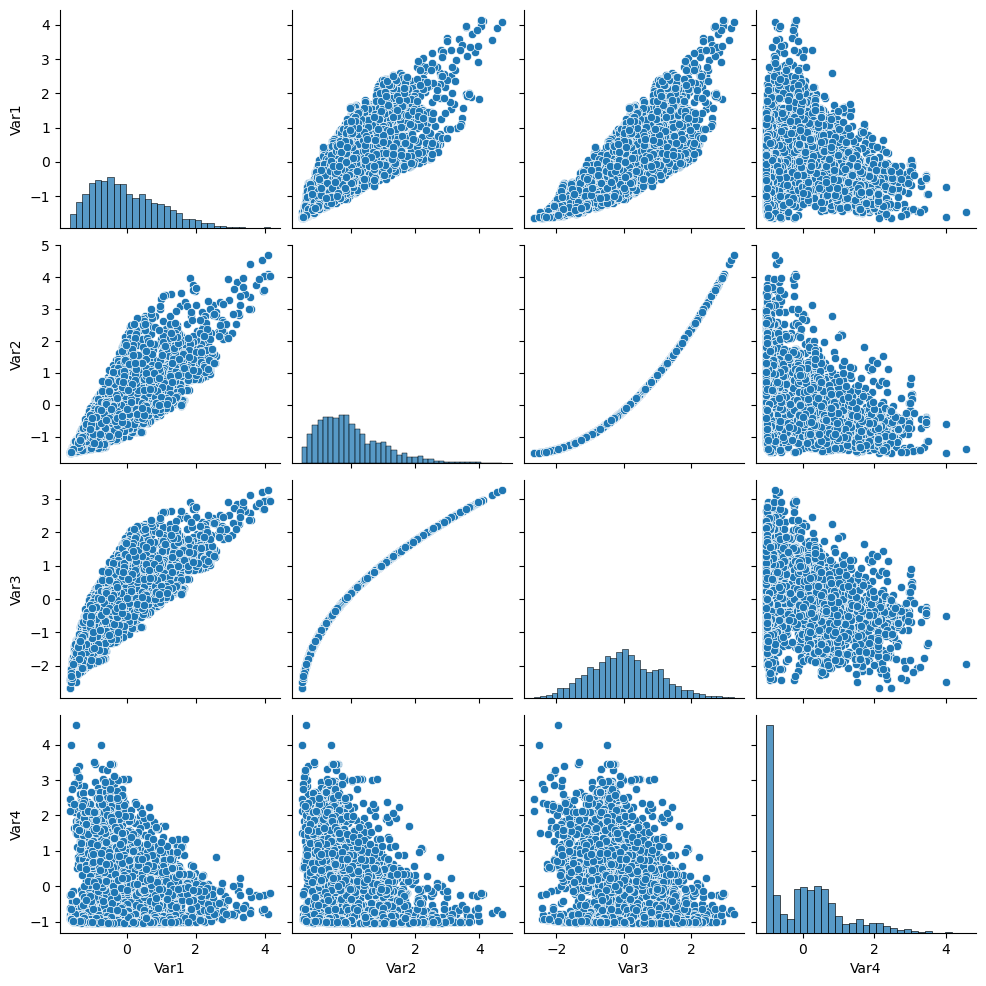

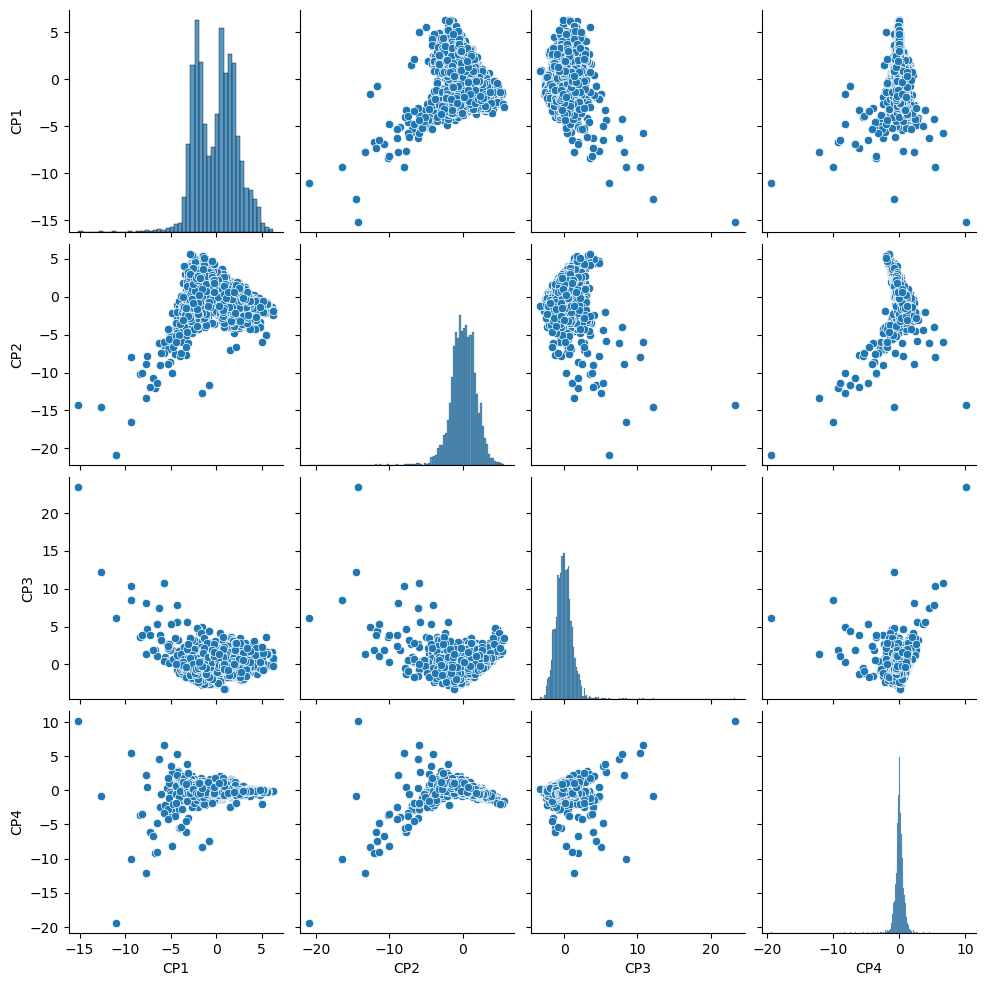

In [135]:
df_original_brain = pd.DataFrame(X_brain_std[:, :4], columns=['Var1', 'Var2', 'Var3', 'Var4'])
sns.pairplot(df_original_brain)
plt.show()

sns.pairplot(df_proyectado)
plt.show()